# 1. Introduction

We aim to accomplish the following for this study:

- Identify which factors contribute to customer churn

- Build a prediction model that can classify if a customer is going to churn or not. 

Preferably and based on model performance, we will choose a model that can attach a probability to the churn. This will help the bank to target the most relevant customers in their efforts to prevent churn

# 2. Dataset Review

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("datasets/churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Questions / Observations: 
1. Why a large % of people exited but still have balance in their account?
2. What does IsActiveMember mean? Some active members have exited the bank and have 0 balance in their account!
3. Understanding which products customers bought rather than product count could improve the model performance.
4. Balance is measured at a particular point in time. The final balance in the accounts is influenced by whether a customer churned or not, thus it is likely to introduce target leakage in the data. The transaction volume rather than the balance could be a better indicator.  

# 3. Exploratory Data Analysis

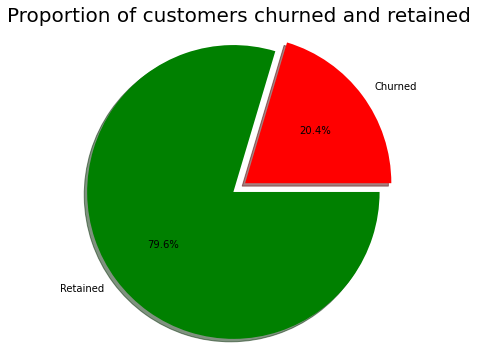

In [32]:
labels = 'Churned', 'Retained'
sizes = [df["Exited"][df['Exited']==1].count(), df["Exited"][df['Exited']==0].count()]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(sizes, labels=labels, explode=explode,  autopct='%.1f%%', shadow=True, colors=["r", "g"])
ax1.axis('equal')
plt.title("Proportion of customers churned and retained", size = 20)
plt.show()

- Apromimately 20% of the customers have churned. Baseline accuracy is 20%. 

- As retaining a customer is many times cheaper than acquiring a new one, we want to prioritize recall over precision.

- The baseline model could be to predict that at least 20% of the customers will churn. 

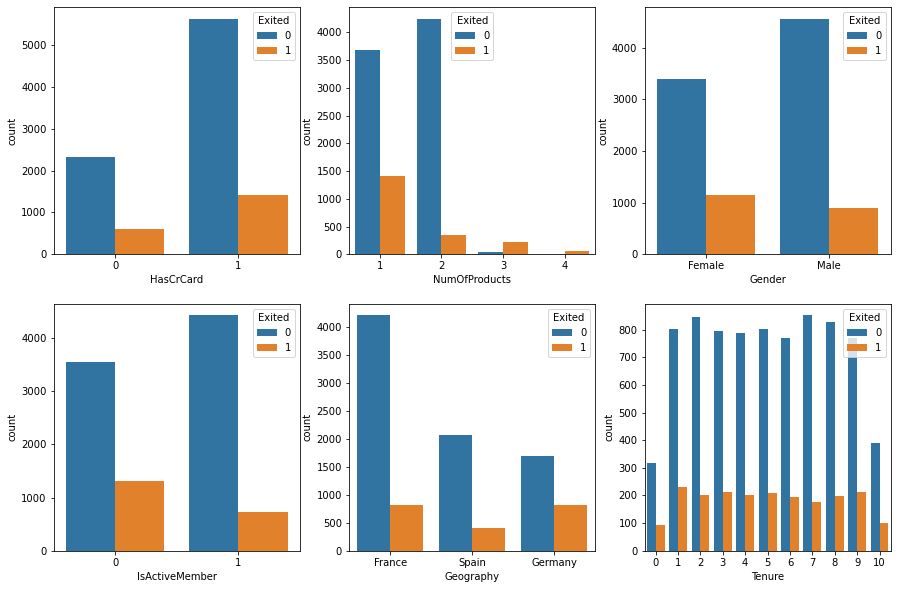

In [54]:
# Reviw ouput's relationship with the categorical variables
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(x="HasCrCard", hue="Exited", data=df, ax = ax[0, 0])
sns.countplot(x="NumOfProducts", hue="Exited", data=df, ax = ax[0, 1])
sns.countplot(x="Gender", hue="Exited", data=df, ax = ax[0, 2])
sns.countplot(x="IsActiveMember", hue="Exited", data=df, ax = ax[1, 0])
sns.countplot(x="Geography", hue="Exited", data=df, ax = ax[1, 1])
sns.countplot(x="Tenure", hue="Exited", data=df, ax = ax[1, 2])
plt.show()

Observations:

- Most users with 3 and 4 products churn, which is counterintuitive. The proportion of users with 4 products is very small, so it might not be statistically significant.
- The proportion of female churners is greater than that of males.
- Active members churn less, unsurprisingly. There is a large proportion of inactive users
- Majority of the data is from persons from France. Highest proportion of churners from Germany.


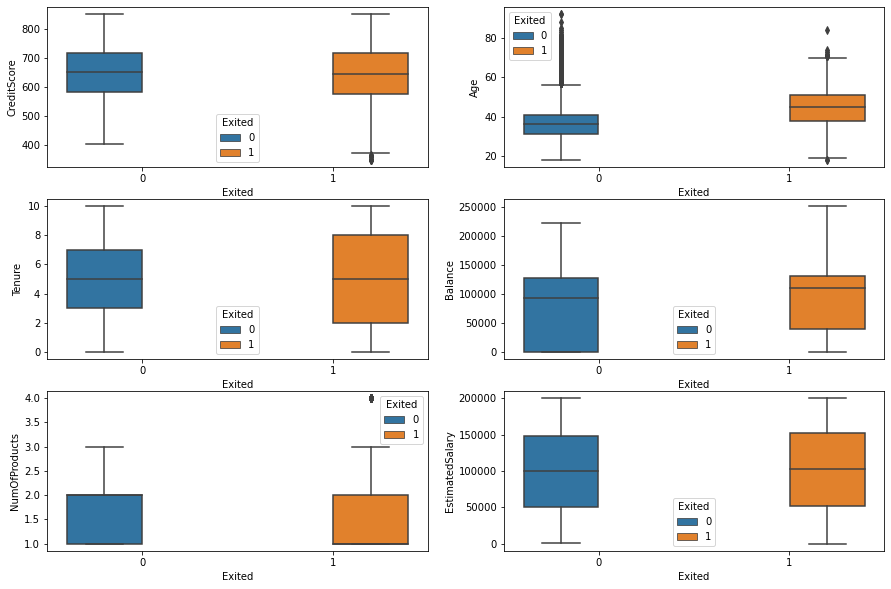

In [52]:
   # Review output's relationship with numerical variables
fig, ax = plt.subplots(3, 2, figsize = (15, 10))
sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited', data = df, ax = ax[0][0])
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited', data = df , ax = ax[0][1])
sns.boxplot(y='Tenure', x = 'Exited', hue = 'Exited', data = df, ax = ax[1][0])
sns.boxplot(y='Balance', x = 'Exited', hue = 'Exited', data = df, ax = ax[1][1])
sns.boxplot(y='NumOfProducts', x = 'Exited', hue = 'Exited', data = df, ax = ax[2][0])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, ax = ax[2][1])
plt.show()

Observaitons:

- Customers with very low credit score are more likely to churn, but otherwise, the distribution looks very similar. 
- Older customers churn more. The bank may need to review the strategy for retention between the different age groups.
- Customers with extreme values for tenure (less than 1 year or more than 10 years) are more likely to churn compared to those in between. 
- Customers with higher balances churn more, worringly.
- Neither the number of products nor salary have a significant effect on the likelihood to churn.

# 4. Feature Engineering

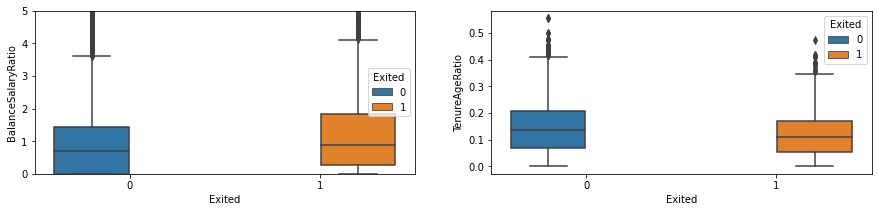

In [90]:
df["BalanceSalaryRatio"] = df.Balance/df.EstimatedSalary
df["TenureAgeRatio"] = df.Tenure/df.Age

fig, ax = plt.subplots(1, 2, figsize = (15, 3), squeeze=False)
sns.boxplot(y='BalanceSalaryRatio', x = 'Exited', hue = 'Exited', data = df, ax = ax[0][0])
ax[0][0].set_ylim(0, 5)
sns.boxplot(y='TenureAgeRatio', x = 'Exited', hue = 'Exited', data = df , ax = ax[0][1])
plt.show()